In [1]:
import numpy as np
import pandas as pd

# Создание симулированных данных
n_normal_transactions = 8000
n_fraud_transactions = 200

# Генерация данных для нормальных транзакций
mean_normal = [100.0, 30.0, 400.0]
std_normal = [20.0, 10.0, 50.0]
normal_transactions = np.random.normal(mean_normal, std_normal, (n_normal_transactions, 3))

# Генерация данных для мошеннических транзакций
mean_fraud = [200.0, 10.0, 1000.0]
std_fraud = [50.0, 5.0, 200.0]
fraud_transactions = np.random.normal(mean_fraud, std_fraud, (n_fraud_transactions, 3))

# Создание DataFrame
columns = ["amount", "time", "merchant_id"]
normal_df = pd.DataFrame(normal_transactions, columns=columns)
fraud_df = pd.DataFrame(fraud_transactions, columns=columns)

# Добавление метки "is_fraud" для обеих категорий транзакций
normal_df["is_fraud"] = 0
fraud_df["is_fraud"] = 1

# Объединение данных
data = pd.concat([normal_df, fraud_df], ignore_index=True)

# Перемешивание данных
data = data.sample(frac=1).reset_index(drop=True)

# Сохранение данных в CSV
data.to_csv("bank_transactions.csv", index=False)


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Создание симулированных данных
n_normal_transactions = 8000
n_fraud_transactions = 200

# ... (предыдущий код для создания данных)

# Разделение данных на обучающий и тестовый набор
X = data.drop("is_fraud", axis=1)
y = data["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Предварительная обработка данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание глубокой нейронной сети
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Оценка производительности модели
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))


Epoch 1/10
164/164 [==============================] - 3s 8ms/step - loss: 0.1427 - accuracy: 0.9766 - val_loss: 0.0103 - val_accuracy: 0.9992
Epoch 2/10
164/164 [==============================] - 1s 3ms/step - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.0062 - val_accuracy: 0.9992
Epoch 3/10
164/164 [==============================] - 1s 4ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 4/10
164/164 [==============================] - 1s 4ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 5/10
164/164 [==============================] - 1s 4ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0017 - val_accuracy: 0.9992
Epoch 6/10
164/164 [==============================] - 1s 3ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0016 - val_accuracy: 0.9992
Epoch 7/10
164/164 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0013 - val_accuracy: 0.9992
Epoch 

interactive(children=(IntSlider(value=100, description='n_estimators', max=200, min=10, step=10), Output()), _…

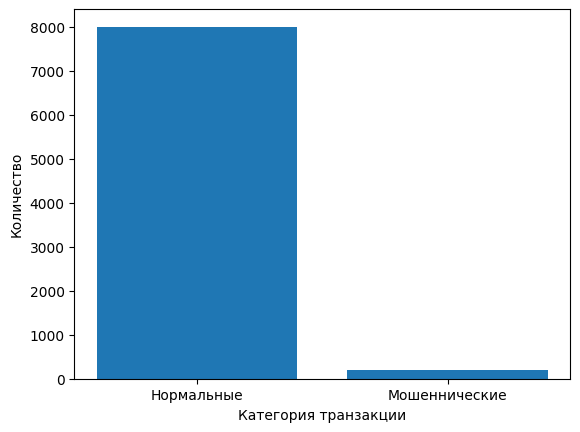

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv("bank_transactions.csv")

# Разделение данных на обучающий и тестовый набор
X = data.drop("is_fraud", axis=1)
y = data["is_fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание функции для обучения модели
def train_model(n_estimators=100):
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Создание интерактивного виджета
@interact(n_estimators=widgets.IntSlider(min=10, max=200, step=10, value=100))
def update_model(n_estimators):
    accuracy = train_model(n_estimators)
    print(f'Точность модели с {n_estimators} деревьями: {accuracy:.2f}')

# Визуализация данных
fraud_counts = data["is_fraud"].value_counts()
plt.bar(fraud_counts.index, fraud_counts.values)
plt.xlabel("Категория транзакции")
plt.ylabel("Количество")
plt.xticks([0, 1], labels=["Нормальные", "Мошеннические"])
plt.show()
